In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

In [3]:
data_df = pd.read_csv("https://raw.githubusercontent.com/HamoyeHQ/stage-f-15-temperature-humidity/master/data/weatherHistory.csv")

## EDA

In [4]:
data_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data_df.shape

(96453, 12)

In [6]:
data_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
data_df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [8]:
data_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
data_df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [10]:
data_df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [11]:
data_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [12]:
precip_grp = data_df.groupby('Precip Type')

In [13]:
precip_grp['Humidity'].describe()

,count,mean,std,min,25%,50%,75%,max
Precip Type,,,,,,,,
rain,85224.0,0.718699,0.198093,0.0,0.58,0.76,0.89,1.0
snow,10712.0,0.863263,0.111007,0.0,0.81,0.88,0.93,1.0


In [14]:
 
precip_grp['Temperature (C)'].agg(['min', 'max'])

,min,max
Precip Type,,
rain,0.005556,39.905556
snow,-21.822222,0.000000


In [15]:
df1 = data_df.copy()

In [16]:
df1.dropna(inplace=True)

In [17]:
df1.corr(method='pearson')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,NaN,-0.005253
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,NaN,-0.000037
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,NaN,0.005375
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,NaN,-0.049453
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,NaN,-0.011629
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,NaN,0.061011
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005253,-0.000037,0.005375,-0.049453,-0.011629,0.061011,NaN,1.000000


In [18]:
#label encoding the rain and snow variables to 0 and 1 respectively
df1['Precip Type']=df1['Precip Type'].replace(['rain','snow'],[0,1])

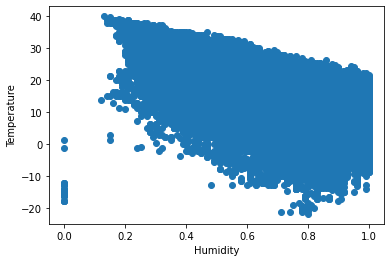

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df1["Humidity"], df1["Temperature (C)"])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.savefig('correla.png')

This shows that the humidity and temparature are negatively correleted

In [20]:
from pandas_profiling import ProfileReport

In [22]:
df1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [23]:
df2= df1.drop_duplicates()

In [24]:
df2.shape

(95912, 12)

In [25]:
 
y=pd.DataFrame()
y=df2['Temperature (C)']
X=df2['Humidity'].values.reshape(-1,1)

In [26]:
X.shape

(95912, 1)

## Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

**Linear Regression Model and its Performance metrics**

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
l_regr = LinearRegression()

In [36]:
l_regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
l_regr.coef_

array([-6.05708731])

In [37]:
#RMSE error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,l_regr.predict(X_test)))
print(rmse)

7.446796271362433


In [38]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, l_regr.predict(X_test))
print(r2_score)

0.3953380152210857


In [39]:
import numpy as np
rss = np.sum(np.square(y_test - l_regr.predict(X_test)))
print(rss)

1063788.9432077848


<function matplotlib.pyplot.show>

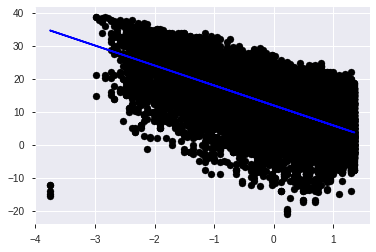

In [40]:
 import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test,y_test, color = 'black')
plt.plot(X_test,l_regr.predict(X_test), color = 'blue')
plt.show

**DecisionTree model and its performance metrics**

In [41]:
from sklearn.tree import DecisionTreeRegressor
 
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [42]:
#rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,tree.predict(X_test)))
print(rmse)

7.169331580698554


In [43]:
#r2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, tree.predict(X_test))
print(r2_score)

0.43955751009445676


In [44]:
import numpy as np
rss = np.sum(np.square(y_test - tree.predict(X_test)))
print(rss)

985993.0656684932


**KNN Regressor**

In [45]:
from sklearn.neighbors import KNeighborsRegressor
 
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [46]:
rss = np.sum(np.square(y_test - knn.predict(X_test)))
print(rss)

1181932.2359580249


In [47]:
rmse=sqrt(mean_squared_error(y_test,knn.predict(X_test)))
print(rmse)

7.8494282762561305


**Random Forest Regressor**

In [48]:
from sklearn.ensemble import RandomForestRegressor
 
rfor = RandomForestRegressor(max_depth=50, n_estimators= 100)
rfor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
rmse=sqrt(mean_squared_error(y_test,rfor.predict(X_test)))
print(rmse)

7.169444598899306


In [50]:
rss = np.sum(np.square(y_test - rfor.predict(X_test)))
print(rss)

986024.1525388157


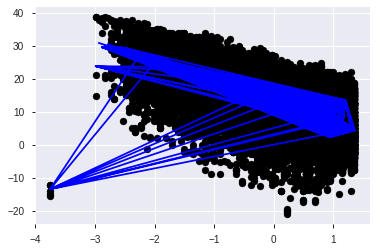

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_test,y_test, color = 'black')
plt.plot(X_test,rfor.predict(X_test), color = 'blue')
plt.show()